*Supervised Learning*

Test Accuracy: 1.000

Confusion Matrix (rows=true, cols=pred):
 [[15  0]
 [ 0 15]]

Classification Report:
                precision    recall  f1-score   support

   Benign (0)       1.00      1.00      1.00        15
Malignant (1)       1.00      1.00      1.00        15

     accuracy                           1.00        30
    macro avg       1.00      1.00      1.00        30
 weighted avg       1.00      1.00      1.00        30

Tumor size 1.60 cm -> Predicted: Benign (0),  Malignant probability: 0.05
Tumor size 2.40 cm -> Predicted: Benign (0),  Malignant probability: 0.49
Tumor size 3.00 cm -> Predicted: Malignant (1),  Malignant probability: 0.90
Tumor size 3.80 cm -> Predicted: Malignant (1),  Malignant probability: 0.99


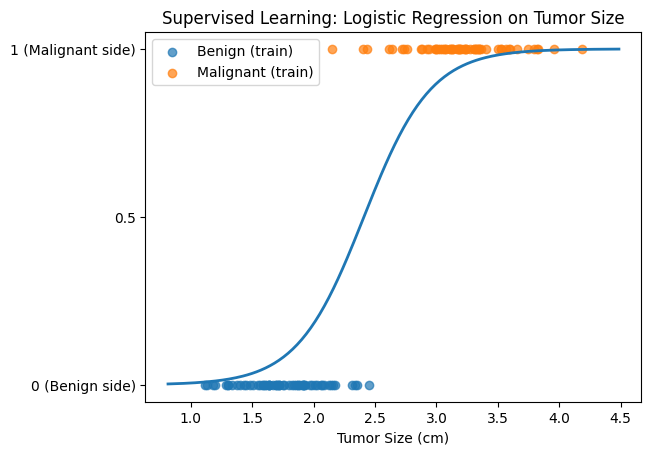

In [11]:
# Simple Supervised Learning demo: classify tumor as Benign (0) or Malignant (1) from size
# We'll create synthetic data, train Logistic Regression, evaluate, and make a few predictions.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Create synthetic dataset (tumor size in cm)
rng = np.random.RandomState(42)
n = 120
# Benign tumors: smaller sizes
benign_sizes = rng.normal(loc=1.8, scale=0.35, size=n//2)  # around 1.8 cm
# Malignant tumors: larger sizes
mal_sizes = rng.normal(loc=3.2, scale=0.4, size=n//2)      # around 3.2 cm

X = np.concatenate([benign_sizes, mal_sizes]).reshape(-1, 1)
y = np.array([0]*(n//2) + [1]*(n//2))  # 0=Benign, 1=Malignant

# 2) Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# 3) Train a simple Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# 4) Evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.3f}")
print("\nConfusion Matrix (rows=true, cols=pred):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Benign (0)", "Malignant (1)"]))

# 5) Predict for new tumor sizes
new_sizes = np.array([[1.6], [2.4], [3.0], [3.8]])
new_preds = clf.predict(new_sizes)
new_probs = clf.predict_proba(new_sizes)[:, 1]  # probability of malignant

for s, p, pr in zip(new_sizes.ravel(), new_preds, new_probs):
    label = "Malignant (1)" if p == 1 else "Benign (0)"
    print(f"Tumor size {s:.2f} cm -> Predicted: {label},  Malignant probability: {pr:.2f}")

# 6) Visualize data and decision boundary (1D)
plt.figure()
# Plot benign and malignant points along x-axis at different y levels for separation
plt.scatter(benign_sizes, np.zeros_like(benign_sizes), label="Benign (train)", alpha=0.7)
plt.scatter(mal_sizes, np.ones_like(mal_sizes), label="Malignant (train)", alpha=0.7)

# Decision boundary: where predicted probability = 0.5
# For logistic regression in 1D, boundary is at size where model predicts 0.5
# We compute it numerically by scanning a range.
xs = np.linspace(X.min()-0.3, X.max()+0.3, 200).reshape(-1, 1)
probs = clf.predict_proba(xs)[:, 1]
plt.plot(xs, probs, linewidth=2)

plt.yticks([0, 0.5, 1], ["0 (Benign side)", "0.5", "1 (Malignant side)"])
plt.xlabel("Tumor Size (cm)")
plt.title("Supervised Learning: Logistic Regression on Tumor Size")
plt.legend(loc="best")
plt.show()


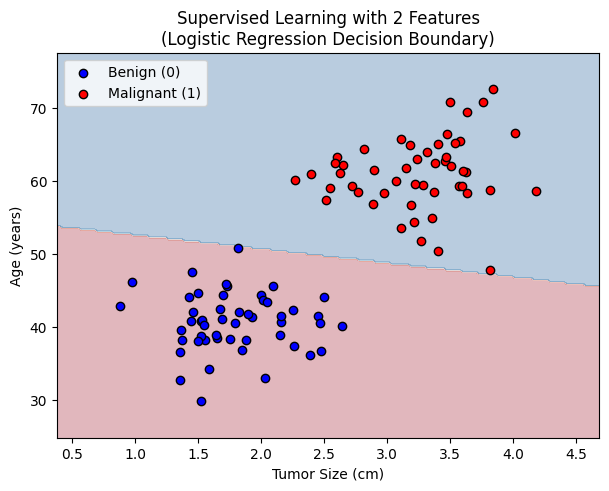

In [12]:
# Supervised Learning demo with 2 features: Tumor Size + Age
# We'll create synthetic data (Benign=blue, Malignant=red), train Logistic Regression, and plot decision boundary.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1) Generate synthetic data
rng = np.random.RandomState(1)
n = 100

# Benign: smaller tumors, younger patients
tumor_size_benign = rng.normal(1.8, 0.4, n//2)
age_benign = rng.normal(40, 5, n//2)

# Malignant: larger tumors, older patients
tumor_size_mal = rng.normal(3.2, 0.5, n//2)
age_mal = rng.normal(60, 5, n//2)

X = np.vstack([
    np.column_stack([tumor_size_benign, age_benign]),
    np.column_stack([tumor_size_mal, age_mal])
])
y = np.array([0]*(n//2) + [1]*(n//2))  # 0=Benign, 1=Malignant

# 2) Train logistic regression
clf = LogisticRegression()
clf.fit(X, y)

# 3) Create mesh grid for decision boundary
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-5, X[:,1].max()+5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4) Plot
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(tumor_size_benign, age_benign, c="blue", label="Benign (0)", edgecolor="k")
plt.scatter(tumor_size_mal, age_mal, c="red", label="Malignant (1)", edgecolor="k")
plt.xlabel("Tumor Size (cm)")
plt.ylabel("Age (years)")
plt.title("Supervised Learning with 2 Features\n(Logistic Regression Decision Boundary)")
plt.legend()
plt.show()
